In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

permittivity_real = np.random.uniform(0, 10, 20000)
permittivity_imaginary = np.random.uniform(0, 0.1, 20000)
orientation = np.random.randint(1, 20, 20000) 
data = {
    'Frequency': np.linspace(1.0, 4.0, 20000),
    'Orientation':orientation,
    'S11 Real': np.random.uniform(-0.01, 0.02, 20000),
    'S11 Imaginary': np.random.uniform(0, 0.06, 20000),
    'S12 Real': np.random.uniform(-0.01, 0.02, 20000),
    'S12 Imaginary': np.random.uniform(0, 0.06, 20000),
    'S21 Real': np.random.uniform(-0.01, 0.02, 20000),
    'S21 Imaginary': np.random.uniform(0, 0.06, 20000),
    'S22 Real': np.random.uniform(-0.01, 0.02, 20000),
    'S22 Imaginary': np.random.uniform(0, 0.06, 20000),
    'Permittivity Real': permittivity_real,
    'Permittivity Imaginary': permittivity_imaginary
}
df = pd.DataFrame(data)
print(f"Output: {permittivity_real}")
print(f"Output: {permittivity_imaginary}")
print(f"Dataframe: ")
print(df)

Output: [4.51330232 0.61900977 4.09297211 ... 2.84026012 8.40206607 6.9531998 ]
Output: [0.01912474 0.02317693 0.03684177 ... 0.09482792 0.0669451  0.02720585]
Dataframe: 
       Frequency  Orientation  S11 Real  S11 Imaginary  S12 Real   
0        1.00000           16  0.008724       0.025007  0.010886  \
1        1.00015           13  0.015691       0.018833  0.004527   
2        1.00030            1 -0.003006       0.035220  0.002666   
3        1.00045           11 -0.009579       0.041015 -0.000778   
4        1.00060            4  0.007096       0.036869  0.008024   
...          ...          ...       ...            ...       ...   
19995    3.99940           10 -0.000217       0.020958  0.013625   
19996    3.99955           14 -0.006367       0.051695  0.017658   
19997    3.99970           11  0.011719       0.059066  0.004694   
19998    3.99985           19  0.003454       0.055017  0.013553   
19999    4.00000           18  0.012178       0.021249 -0.001556   

       S12 

In [19]:
df

,Frequency,Orientation,S11 Real,S11 Imaginary,S12 Real,S12 Imaginary,S21 Real,S21 Imaginary,S22 Real,S22 Imaginary,Permittivity Real,Permittivity Imaginary
0,1.00000,16,0.008724,0.025007,0.010886,0.023966,0.009411,0.037015,0.003761,0.002830,4.513302,0.019125
1,1.00015,13,0.015691,0.018833,0.004527,0.035731,0.009348,0.039177,0.014934,0.049005,0.619010,0.023177
2,1.00030,1,-0.003006,0.035220,0.002666,0.028134,0.010529,0.058254,0.011598,0.054404,4.092972,0.036842
3,1.00045,11,-0.009579,0.041015,-0.000778,0.004909,0.010143,0.027755,-0.009105,0.055357,0.941890,0.016313
4,1.00060,4,0.007096,0.036869,0.008024,0.058593,0.013517,0.055649,-0.003622,0.058474,8.233330,0.017246
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.99940,10,-0.000217,0.020958,0.013625,0.042020,-0.003958,0.047368,0.005465,0.002551,0.707441,0.068617
19996,3.99955,14,-0.006367,0.051695,0.017658,0.038005,-0.005154,0.040973,0.004923,0.048979,7.158712,0.021436
19997,3.99970,11,0.011719,0.059066,0.004694,0.046081,0.001727,0.043722,0.006705,0.004671,2.840260,0.094828
19998,3.99985,19,0.003454,0.055017,0.013553,0.003223,0.018772,0.047829,-0.005658,0.043202,8.402066,0.066945


In [20]:
df.columns = ['frequency','orientation','s11_real','s11_imaginary','s12_real','s12_imaginary','s21_real','s21_imaginary','s22_real','s22_imaginary','permittivity_real','permittivity_imaginary']

In [21]:
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit(df[['s11_real','s11_imaginary','s12_real','s12_imaginary','s21_real','s21_imaginary','s22_real','s22_imaginary','permittivity_real','permittivity_imaginary']])
df[['s11_real','s11_imaginary','s12_real','s12_imaginary','s21_real','s21_imaginary','s22_real','s22_imaginary','permittivity_real','permittivity_imaginary']] =  X_norm.transform(df[['s11_real','s11_imaginary','s12_real','s12_imaginary','s21_real','s21_imaginary','s22_real','s22_imaginary','permittivity_real','permittivity_imaginary']])

In [22]:
df['orientation'] = df['orientation'].astype('category')
df = pd.get_dummies(df, columns=['orientation'])

In [23]:
c = []
for i in df.columns:
    if i != permittivity_real or i !=permittivity_imaginary:
        c.append(i)

/var/folders/lk/g6q_4n912156v7109ds7l5mm0000gn/T/ipykernel_62914/1338281437.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i != permittivity_real or i !=permittivity_imaginary:


In [24]:
df_original = df.copy()

In [25]:
X = df[c].values
y = df[['permittivity_real','permittivity_imaginary']].values

In [26]:
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]
split_point = int(0.8 * len(X))
X_train = X[:split_point]
y_train = y[:split_point]
X_val = X[split_point:]
y_val = y[split_point:]

In [27]:
X_train.shape

(16000, 30)

In [28]:
y_train.shape

(16000, 2)

In [29]:
X_val.shape

(4000, 30)

In [30]:
y_val.shape

(4000, 2)

In [31]:
def mae_loss(y_true, y_pred):
    y_true_real, y_true_imag = tf.split(y_true, 2, axis=-1)
    y_pred_real, y_pred_imag = tf.split(y_pred, 2, axis=-1)
    loss_real = tf.losses.mean_absolute_error(y_true_real, y_pred_real)
    loss_imag = tf.losses.mean_absolute_error(y_true_imag, y_pred_imag)
    return loss_real + loss_imag
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(y.shape[1], activation='linear')
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss=[mae_loss],
              metrics=[tf.metrics.MeanAbsoluteError(), tf.metrics.MeanSquaredError()])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               3968      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 14866 (58.07 KB)
Trainable params: 14866 (58.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)
X_val = X_val.astype(float)
y_val = y_val.astype(float)

Epoch 1/10
16000/16000 [==============================] - 10s 590us/step - loss: 0.0934 - mean_absolute_error: 0.0467 - mean_squared_error: 0.0099 - val_loss: 0.0249 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 2.5706e-04
Epoch 2/10
16000/16000 [==============================] - 9s 550us/step - loss: 0.0213 - mean_absolute_error: 0.0107 - mean_squared_error: 1.8912e-04 - val_loss: 0.0167 - val_mean_absolute_error: 0.0083 - val_mean_squared_error: 1.0376e-04
Epoch 3/10
16000/16000 [==============================] - 9s 573us/step - loss: 0.0165 - mean_absolute_error: 0.0083 - mean_squared_error: 1.1298e-04 - val_loss: 0.0127 - val_mean_absolute_error: 0.0064 - val_mean_squared_error: 6.6348e-05
Epoch 4/10
16000/16000 [==============================] - 11s 658us/step - loss: 0.0143 - mean_absolute_error: 0.0072 - mean_squared_error: 8.5404e-05 - val_loss: 0.0169 - val_mean_absolute_error: 0.0084 - val_mean_squared_error: 9.9270e-05
Epoch 5/10
16000/16000 [==================

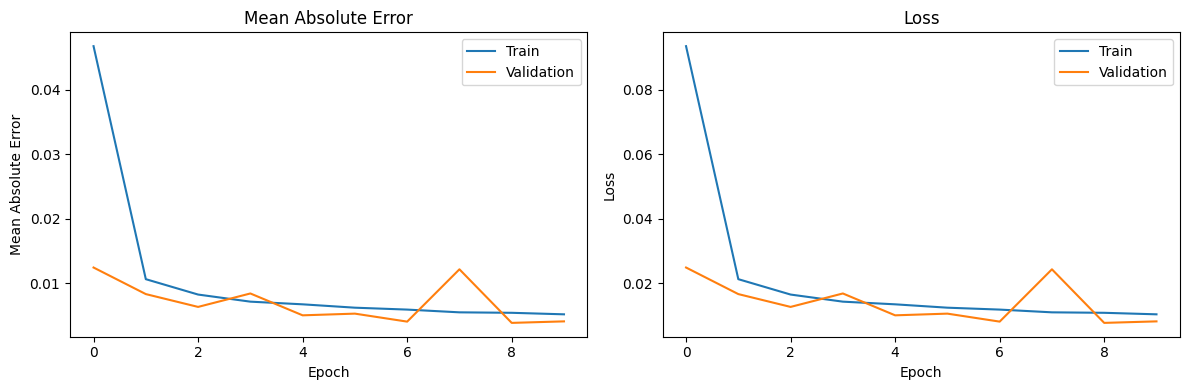

In [34]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=1)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()


In [35]:
collapse_orientation = df_original[['orientation_1', 'orientation_2', 'orientation_3', 'orientation_4',
                                   'orientation_5', 'orientation_6', 'orientation_7', 'orientation_8',
                                   'orientation_9', 'orientation_10', 'orientation_11', 'orientation_12',
                                   'orientation_13', 'orientation_14', 'orientation_15', 'orientation_16',
                                   'orientation_17', 'orientation_18', 'orientation_19']].idxmax(axis=1)
collapse_orientation_int = collapse_orientation.str.extract(r'(\d+)').astype(int)
collapse_orientation_int.columns = ['orientation']


125/125 [==============================] - 0s 420us/step


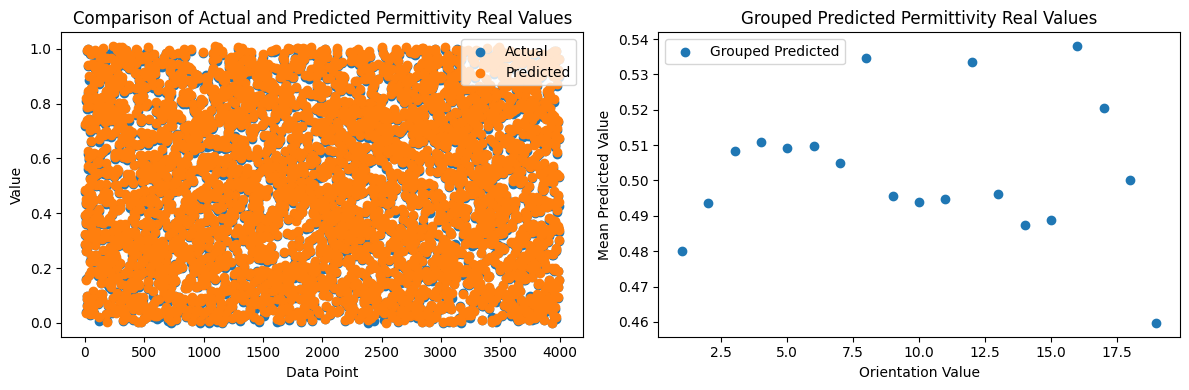

In [36]:
y_pred = model.predict(X_val)
df_predicted = pd.DataFrame({'orientation_value': collapse_orientation_int['orientation'][split_point:], 'y_pred': y_pred[:, 0]})
y_pred_grouped = df_predicted.groupby('orientation_value')['y_pred'].mean().reset_index()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val[:, 0], label='Actual')
plt.scatter(range(len(y_pred)), y_pred[:, 0], label='Predicted')
plt.title('Comparison of Actual and Predicted Permittivity Real Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y_pred_grouped['orientation_value'], y_pred_grouped['y_pred'], label='Grouped Predicted')
plt.title('Grouped Predicted Permittivity Real Values')
plt.xlabel('Orientation Value')
plt.ylabel('Mean Predicted Value')
plt.legend()
plt.tight_layout()
plt.show()


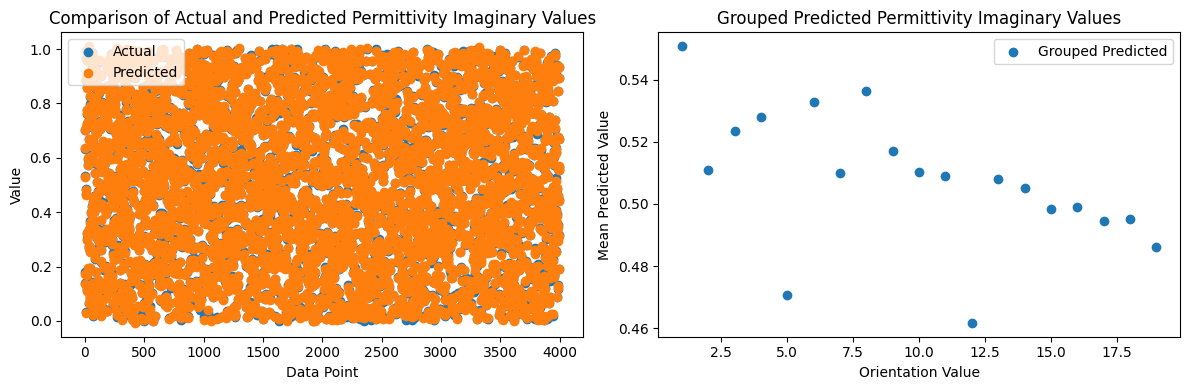

In [37]:
df_predicted = pd.DataFrame({'orientation_value': collapse_orientation_int['orientation'][split_point:], 'y_pred': y_pred[:, 1]})
y_pred_grouped = df_predicted.groupby('orientation_value')['y_pred'].mean().reset_index()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_val)), y_val[:, 1], label='Actual')
plt.scatter(range(len(y_pred)), y_pred[:, 1], label='Predicted')
plt.title('Comparison of Actual and Predicted Permittivity Imaginary Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y_pred_grouped['orientation_value'], y_pred_grouped['y_pred'], label='Grouped Predicted')
plt.title('Grouped Predicted Permittivity Imaginary Values')
plt.xlabel('Orientation Value')
plt.ylabel('Mean Predicted Value')
plt.legend()
plt.tight_layout()
plt.show()